# Load data

In [1]:
from regression20241117 import *
sessdf = pd.read_csv('L:/4portProb_processed/sessdf.csv')
sessdf.drop(columns = 'Unnamed: 0', inplace = True)
window = 7
exclude = ['[ 20  20  20 100]', '[0 0 0 0]', '[0]', '[0 0]',
       '[1000   80]', '[30]', '[40]', '[70]']
sessdf = sessdf[~sessdf.rewprobfull.isin(exclude)]
sessdf = sessdf[~sessdf.duplicated(subset = ['animal', 'session', 'trialstart', 'eptime'], keep = False)]

# Prepare X and y columns

In [2]:
hist = 6
data_unstr = data_prep(sessdf, hist = hist, trialsinsess = 100, task = 'unstr', head = True)
for i in range(1,hist):
    data_unstr[f'ct{i}_rt{i}'] = data_unstr[f'ct{i}']*data_unstr[f'rt{i}']

# Run linear models and plot coefficients

Alakazam, RMSE = 0.66184, Score = 0.56948
Bayleef, RMSE = 0.29847, Score = 0.89806
Blissey, RMSE = 0.45523, Score = 0.59602
Chikorita, RMSE = 0.53899, Score = 0.82278
Cresselia, RMSE = 0.34484, Score = 0.92239
Darkrai, RMSE = 0.49634, Score = 0.7811
Dratini, RMSE = 0.31436, Score = 0.88693
Eevee, RMSE = 0.52273, Score = 0.78998
Goldeen, RMSE = 0.60431, Score = 0.63044
Hoppip, RMSE = 0.39561, Score = 0.7928
Inkay, RMSE = 0.40949, Score = 0.84362
Jirachi, RMSE = 0.54225, Score = 0.76655
Kirlia, RMSE = 0.37267, Score = 0.85653
Mesprit, RMSE = 0.67985, Score = 0.60511
Nidorina, RMSE = 0.30022, Score = 0.79732
Oddish, RMSE = 0.34887, Score = 0.84704
Phione, RMSE = 0.38254, Score = 0.86263
Quilava, RMSE = 0.38369, Score = 0.84638
Raltz, RMSE = 0.47846, Score = 0.72706
Shinx, RMSE = 0.46639, Score = 0.64512
Togepi, RMSE = 0.44623, Score = 0.83245
Umbreon, RMSE = 0.49616, Score = 0.83451
Vulpix, RMSE = 0.36244, Score = 0.87744
Xatu, RMSE = 0.53205, Score = 0.78345
Yanma, RMSE = 0.61438, Score 

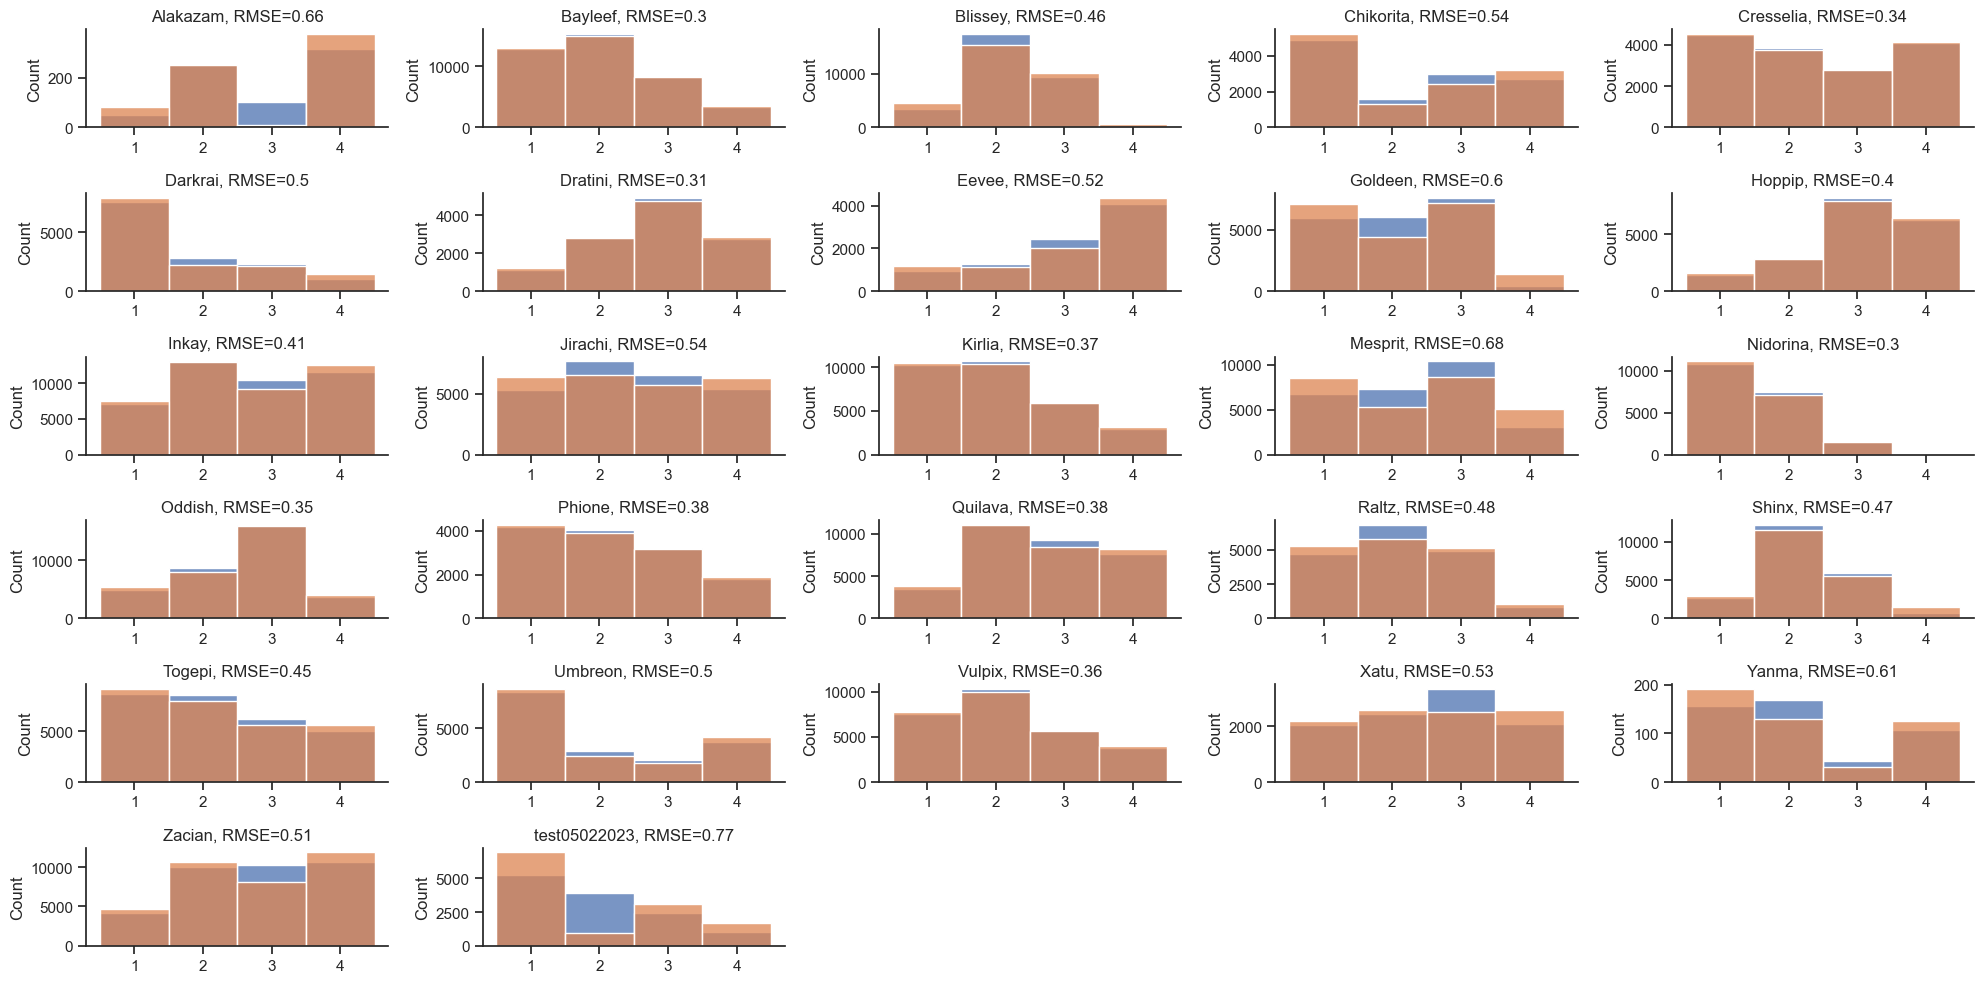

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, root_mean_squared_error
from sklearn.linear_model import LinearRegression

from pandas.api.types import CategoricalDtype
# catdtype = CategoricalDtype(categories=np.arange(1,5), ordered = False) predicting numeric values

crs = [f'ct{i}_rt{i}' for i in range(1,hist)]
rs = [f'rt{i}' for i in range(1,hist)]
cs = [f'ct{i}' for i in range(1,hist)]

# define model vars
x_cols = cs 
y_cols = ['ct0']

# which models/sims?
an_list = data_unstr.animal.sort_values().unique()

# fit model separately for each animal/simulation
ind = 1
fig = plt.figure(figsize = (20, 10))
rmse_all = []
for an in an_list:
    y = data_unstr.groupby('animal').get_group(an)[y_cols].astype(float).to_numpy().flatten()
    X = data_unstr.groupby('animal').get_group(an)[x_cols].reset_index().drop(columns = 'index')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
            
    lr = LinearRegression(fit_intercept = True)
    lr.fit(X_train, y_train)
    
    cols = lr.feature_names_in_
    # ind = lr.classes_
    #         ind = [1.0]
            
    score = lr.score(X_test, y_test)
    
    # y_pred_proba = lr.predict_proba(X_train)
    y_pred = lr.predict(X_train)
    
    # ll_null = log_loss(y_train, [calc_prob(y_train)]*len(y_train), labels = [1,2,3,4])
    # ll_model = log_loss(y_train, y_pred_proba, labels = [1,2,3,4])
    
    # ll_null = log_loss(y_train, [calc_prob(y_train)]*len(y_train))
    # ll_model = log_loss(y_train, y_pred_proba)
    # pseudo_r2 = (ll_null - ll_model) / ll_null
    rmse = root_mean_squared_error(y_train, y_pred)
    rmse_all.append(rmse)
    print(f'{an}, RMSE = {round(rmse, 5)}, Score = {round(score, 5)}')
    
    ax = plt.subplot(6, 5, ind)
    # ax.bar(['intercept'] + x_cols, np.hstack([lr.intercept_, lr.coef_]))
    sns.histplot(y_pred, bins = 4, binrange = (0.5,4.5), ax=ax)
    sns.histplot(y_train, discrete = True, ax = ax)
    ax.set_title(f'{an}, RMSE={round(rmse, 2)}')
    ind+=1
    
sns.despine()
plt.tight_layout()

In [9]:
np.mean(rmse_all)

0.4703868596759783